# Exploring Coordination between Brain Regions Using EEG Data

## Coordination in Neuroscience

Recent views in the field of cognitive neuroscience describe the brain as a dynamic network of interconnected regions (Bressler & Kelso, 2016). These regions coordinate their activities to generate cognitive processes.The coordination happens as  different brain areas send signals to each other in a reciprocal manner (Bressler & Kelso, 2016). This back-and-forth flow of information allows for the processing of complex tasks. Some regions specialize in specific functions, while others bring together information from multiple areas (Bressler & Kelso, 2016).This cooperative and competitive relationship between brain regions as well as within brain regions is crucial for cognition. It helps us understand how different parts of the brain work together to create our thoughts and experiences.

In this entry, we will explore how different areas of the brain interact during a learning task, where participants were asked to listen to a robot informing them about a medical condition, while imagining that the information is pertinent to them. EEG data were recorded during this task using 8 electrodes with a standard 10/20 placement including frontal, central, parietal and occipital electrodes. Note that EEG has low spatial resolution due to only recording electrical data from the surface of the scalp where signals from different regions have become intermixed and their soruces can not be accurately pinpointed but due to its high temporal resolution, ease of use and portability, EEG is the most widely available form of neural data. Consequently, it has still found extensive use in functional connectivity analysis despite its limitations in precisely differentiating regions (Zhang et al., 2016; Toth et al., 2012; Imperatori et al., 2019; Briels et al., 2020 and many others). For our data, a further limitation is the lower number of electrodes (8), which may limit the accuracy of any results. However, the methodology is still interesting to explore and could give insights into the possibility of using more afforadable and user friendly EEG headsets with fewer channels for this type of analysis. As some EEG devices and applications have ambitions to move out of the lab and be approachable for the general population, these could be important factors in the future.


## The Complex Systems Approach to Neural Coordination

In the context of the complex systems approach, coordination refers to the way components and processes of a system (in this case, the brain) change together over time in order to "describe, explain, and predict how patterns of coordination form, adapt, persist, and change" (Butler, 2011; Kelso, 2009). 
Phase synchronization and coordination play crucial roles in self-organizing systems, such as the brain, which also exhibits shynchronization phenomena (Kelso, 2009). Oscillations in the brain, particularly in the gamma band, become coupled or "bound" together, forming a coherent network when we pay attention, perceive, think, and act (Kelso, 2009).

Although the brain consists of numerous regions, only a specific set of regions appears to be functionally connected during specific tasks (Kelso, 2009). Each neural region is capable of intrinsic oscillatory activity, and coordination emerges from changes in coupling between these regions (Kelso, 2009). The coordination is characterized by phase variables, which describe the timing of oscillatory behavior in each brain area. Relative phase is a key coordination variable, although amplitudes and frequencies may also be important (Kelso, 2009).

Coordination (often referred to as connectivity) measures in neuroscience can be power-based or phase-based. Power-based measures analyze changes in the power of specific oscillations between brain regions, while phase-based measures examine the relationship between the phase angles of voltage shifts (Miljevic et al., 2022). Phase-based measures are less sensitive to spurious interactions caused by recording or analysis artifacts and are thought to reveal the timing of activity within neural populations; phase-based measures are more commonly used in research and are particularly useful for studying instantaneous connectivity (Miljevic et al., 2022). In this entry, we will focus on phase-based measures.

## Phase Synchronization

The approach in this entry will mainly be to compare how the different conditions: Adaptive where the robot giving them information adapts to their brain activity with gestures to try to re-engage them and Random where the robot gestures at random intervals. Different metrics for phase synchronization in EEG data will also be compared in terms of the results as a multitude of different metrics are used in literature and it is not always clear which one is the optimal choice or whether the choice of connectivity metric will affect reproducability of results (Briels et al., 2020).

We will use MNE-connectivity (version 0.5.0), which is an open source Python package for neurophysiological connectivity analysis. MNE-connectivity includes the following metrics for phase synhzronization and we will compare the results with all of them:

* Coherence (coh): Measures the linear correlation between the magnitude spectra of two signals.
* Imaginary coherence (imcoh): Calculates the imaginary part of coherence, capturing phase relationships between signals.
* Phase-Locking Value (plv): Quantifies the phase synchronization between two signals by calculating the consistency of their phase differences.
* Corrected Imaginary Part of Phase-Locking Value (ciplv): Similar to PLV, but with correction to remove spurious interactions.
* Pairwise Phase Consistency (ppc): Estimates the consistency of phase differences across trials or epochs.
* Phase Lag Index (pli): Measures the asymmetry in the distribution of phase differences to assess phase synchronization.
* Debiased Phase Lag Index (dpli): Similar to PLI, but with correction to reduce bias in estimating phase synchronization.
* Weighted Phase Lag Index (wpli): Measures phase synchronization, giving more weight to strong phase differences.
* Debiased Weighted Phase Lag Index (wpli2_debiased): Enhanced version of WPLI with a debiasing correction to improve accuracy.



# Data

As mentioned earlier, we will be using 8-channel EEG data collected over 10 minutes of a participants listening to medical information presented by a social robot, with a total of 40 participants. The data has already been cleaned and preprocessed (the preprocessing steps and more information on the dataset can be found [here](https://github.com/catececcato/ComplexSystems/blob/main/README.md)). 

Or data was collected in two conditions, Adaptive and Random. In the Adaptive condition, the robot tried to re-engage the participant with adaptively timed gestures, whereas in the random condition gestures were performed at random intervals. Before going into the different measures of phase synchrony, we can check if there is a difference in brain connectivity between the two conditions. As a small spoiler, our previous analysis revealed minimal differences between the conditions in both subjective perception and EEG data, so we don't expect to see a significant difference here either.

## MNE Pipeline for Importing Data

In order to use MNE functions, we will need to import the data in a specific way during which we specify the montage of our electrodes, our channels and non-EEG channel variables and create epochs. Our data did not originally have epochs, so here I am creating fixed length epochs of 30 seconds.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True) # Connecting to Google Drive to import our data files

Mounted at /content/gdrive


In [ ]:
!pip install mne # After this point, we will need mne so make sure to install it if you don't have it yet

In [182]:
import os
import mne
from mne import create_info
from mne.io import RawArray
import warnings
warnings.filterwarnings("ignore") # There is a lot of output from the importing process and the warnings are not relevant in our case :)

path = "/content/gdrive/MyDrive/ThesisGroup/IEEE2023 ComplexSystems/HamzahDataClean/AdaptiveFirst/P1"

def LoadData(path):
    montage = mne.channels.make_standard_montage('standard_1020')
    participants_data = []
    
    # Iterate over files in the specified path
    for fname in os.listdir(path)[:]:
        
        ch_names = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'AdaptiveRandom', 'FirstSecond', 'Participant']
        ch_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', "misc", "misc", "misc"]
        
        # Check if the file is in the .n.set format
        if "n.set" in fname:
            print(fname)
            
            # Read the raw EEG data from the file
            participant = mne.io.read_raw_eeglab(path + "/" + fname, verbose=False)
            sampling_freq = 256  # in Hertz
            
            # Create information about channels and sampling frequency
            info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sampling_freq)
            
            # Create a RawArray object from the participant data
            participant = mne.io.RawArray(participant.get_data(), info)
            
            # Get the events array from the participant data
            events = mne.events_from_annotations(participant)[0]

            # Divide the continuous data into equal-sized segments (epochs)
            segment_duration = 30  #30 seconds
            epochs_participant = mne.make_fixed_length_epochs(participant, duration=segment_duration)
            epochs_participant.set_montage(montage)
            epochs_participant.load_data()
            epochs_participant = epochs_participant.pick_types(eeg=True)
            
            # Get the data from the Epochs object and append to the list
            epochs_data = epochs_participant.get_data()
            participants_data.append(epochs_data)
    
    return participants_data

# Load data for the "raw_adaptive" variable
raw_adaptive = LoadData("/content/gdrive/MyDrive/ThesisGroup/IEEE2023 ComplexSystems/SETFiles/SET/AdaptiveClean")

# Load data for the "raw_random" variable
raw_random = LoadData("/content/gdrive/MyDrive/ThesisGroup/IEEE2023 ComplexSystems/SETFiles/SET/RandomClean")


6Adaptive_Clean.set
Creating RawArray with float64 data, n_channels=11, n_times=155184
    Range : 0 ... 155183 =      0.000 ...   606.184 secs
Ready.
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 7680 original time points ...
0 bad epochs dropped
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
7Adaptive_Clean.set
Creating RawArray with float64 data, n_channels=11, n_times=132618
    Range : 0 ... 132617 =      0.000 ...   518.035 secs
Ready.
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 17 events and 7680 original time points ...
0 bad epochs dropped
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
8Adaptive_Clean.set
Creating RawArray with float64 data, n_channels=11, n_times=157912
    Range : 0 ... 157911 =      0.000 ...   616

Since there is a lot of noise and variability in EEG data, it's good practice to normalize the data before further analysis. We will do this with MinMaxScaled from sklearn.

In [183]:
from sklearn.preprocessing import MinMaxScaler

def normalize(participants_data):
    normalized_data = []
    
    # Iterate over participant data
    for participant_data in participants_data:
        min_max_scaler = MinMaxScaler()
        
        # Reshape participant data for scaling
        data_reshaped = participant_data.reshape(-1, participant_data.shape[-1]).T
        
        # Apply Min-Max scaling to the reshaped data
        data_scaled = min_max_scaler.fit_transform(data_reshaped).T
        
        # Reshape the scaled data back to its original shape
        data_scaled = data_scaled.reshape(participant_data.shape)
        
        # Append the normalized data to the list
        normalized_data.append(data_scaled)
    
    return normalized_data

# Normalize the "raw_adaptive" data
normalized_adaptive = normalize(raw_adaptive)

# Normalize the "raw_random" data
normalized_random = normalize(raw_random)

## Connectivity Analysis

### Comparing the Conditions

First, we will calculate the average sprectral connectivity across participants for all epochs (30 second windows) per condition (Adaptive and Random) using PLI (Phase Lag Index). We will focus on the alpha, beta and theta frequency bands as these have been identified in literature to play a role in learning and retaining information.

In [ ]:
!pip install mne_connectivity # We will need to install the connectivity branch of mne separately even if we already have mne

In [ ]:
from mne_connectivity import spectral_connectivity_epochs

con_adaptive = []  # List to store spectral connectivity for adaptive condition
con_random = []  # List to store spectral connectivity for random condition

# Iterate over the data for each participant
for n in range(len(raw_adaptive)):
    epochs_adaptive_n = normalized_adaptive[n]  # Get normalized epochs data for the nth participant in adaptive condition
    epochs_random_n = normalized_random[n]  # Get normalized epochs data for the nth participant in random condition

    # Calculate spectral connectivity for adaptive condition
    con_adaptive_n = spectral_connectivity_epochs(epochs_adaptive_n, method='pli', sfreq=256, mode='multitaper', fmin=(0.5), fmax=(30), faverage=True, n_jobs=1)
    con_adaptive.append(con_adaptive_n)  # Append the calculated connectivity to the list

    # Calculate spectral connectivity for random condition
    con_random_n = spectral_connectivity_epochs(epochs_random_n, method='pli', sfreq=256, mode='multitaper', fmin=(0.5), fmax=(30), faverage=True, n_jobs=1)
    con_random.append(con_random_n)  # Append the calculated connectivity to the list


With the PLI values we saved per condition per electrode pair, we can visualize the results in a circular connectivity plot.

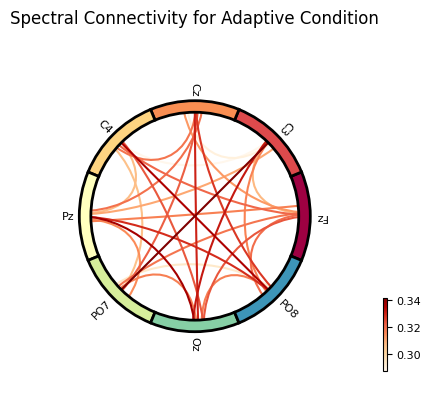

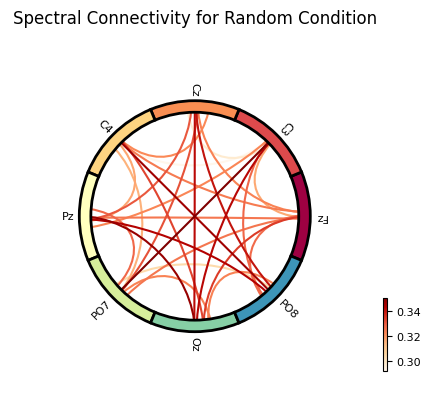

In [89]:
import matplotlib.pyplot as plt
from mne_connectivity.viz import plot_connectivity_circle

# Average the connectivity values across all instances for adaptive condition
con_matrices_adaptive = [con.get_data() for con in con_adaptive]
con_matrices_adaptive = [con.reshape((8, 8)) for con in con_matrices_adaptive]
con_adaptive_mean = np.mean(con_matrices_adaptive, axis=0)

# Average the connectivity values across all instances for random condition
con_matrices_random = [con.get_data() for con in con_random]
con_matrices_random = [con.reshape((8, 8)) for con in con_matrices_random]
con_random_mean = np.mean(con_matrices_random, axis=0)

# Node names (our electrodes)
node_names = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

# Plotting the connectivity in the adaptive condition
plot_connectivity_circle(con_adaptive_mean, node_names, n_lines=None, node_angles=None, node_colors=None, title=f'Spectral Connectivity for Adaptive Condition', textcolor='black', facecolor='white', colormap='OrRd')
plt.show()

# And in the random condition
plot_connectivity_circle(con_random_mean, node_names, n_lines=None, node_angles=None, node_colors=None, title=f'Spectral Connectivity for Random Condition', textcolor='black', facecolor='white', colormap='OrRd')
plt.show()

On visual observation, a lot of information seems to be exchanged between the following pairs of electrodes: C4 - PO7, C3 - PO7 and PZ - Oz & PO8. Note that PLI measures information flow in both directions, so there is no specific directionality to the interactions. As for the differences between conditions, I can see very small differences in connection strength or shape but as expected, the differences are minimal. Let's check the means and do a statistical test just to be sure.

Let's check if the data is normally distributed to see what kind of test would be appropriate.

In [104]:
from scipy.stats import shapiro

# Flatten the connectivity matrices
con_adaptive_flat = con_adaptive_mean.flatten()
con_random_flat = con_random_mean.flatten()

# Perform Shapiro-Wilk test for normality
_, p_value_adaptive = shapiro(con_adaptive_flat)
_, p_value_random = shapiro(con_random_flat)

# Print the test results
print("Shapiro-Wilk test for normality:")
print(f"Adaptive condition p-value: {p_value_adaptive:.20f}")
print(f"Random condition p-value: {p_value_random:.20f}")

Shapiro-Wilk test for normality:
Adaptive condition p-value: 0.00000000006302967870
Random condition p-value: 0.00000000006655821033


The data is not normally distributed for either condition so let's go for a non-parametric test, specifically Wilcoxon signed-rank test as we have related pairs of data.

In [196]:
from scipy.stats import wilcoxon

# Get the mean values
print("Adaptive mean:", np.mean(con_adaptive_flat))
print("Random mean:", np.mean(con_random_flat))

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(con_adaptive_flat, con_random_flat)

# Print the test results
print("Wilcoxon signed-rank test results:")
print(f"Test statistic: {statistic}")
print(f"p-value: {p_value:.20f}")


Adaptive mean: 0.1390257190043667
Random mean: 0.14313788507746578
Wilcoxon signed-rank test results:
Test statistic: 0.0
p-value: 0.00000378961944158087


Surprisingly, the small differences do seem to be significant overall, although I would not have guessed it by looking at the plots or our prior analysis. Further on, we will see if the choice of metric (PLV in this case) influences this but for now, let's go a bit more in depth in our visual analysis.

In [ ]:
# Create a list of different metrics:
metrics = ['coh', 'cohy', 'imcoh','plv', 'ciplv', 'ppc', 'pli', 'dpli', 'wpli', 'wpli2_debiased']

con_adaptive_metrics = []  # List to store spectral connectivity for adaptive condition
con_random_metrics = []  # List to store spectral connectivity for random condition

# Iterate over the data for each participant
for n in range(len(raw_adaptive)):
    epochs_adaptive_n = normalized_adaptive[n]  # Get normalized epochs data for the nth participant in adaptive condition
    epochs_random_n = normalized_random[n]  # Get normalized epochs data for the nth participant in random condition

    # Calculate spectral connectivity for adaptive condition
    con_adaptive_n = spectral_connectivity_epochs(epochs_adaptive_n, method=metrics, sfreq=256, mode='multitaper', fmin=(0.5), fmax=(30), faverage=True, n_jobs=1)
    con_adaptive_metrics.append(con_adaptive_n)  # Append the calculated connectivity to the list

    # Calculate spectral connectivity for random condition
    con_random_n = spectral_connectivity_epochs(epochs_random_n, method=metrics, sfreq=256, mode='multitaper', fmin=(0.5), fmax=(30), faverage=True, n_jobs=1)
    con_random_metrics.append(con_random_n)  # Append the calculated connectivity to the list



In [185]:
# Create a list of different metrics:
metrics = ['coh', 'imcoh','plv', 'ciplv', 'ppc', 'pli', 'dpli', 'wpli', 'wpli2_debiased']

con_adaptive_metrics = []  # List to store spectral connectivity for adaptive condition
con_random_metrics = []  # List to store spectral connectivity for random condition

# Calculate spectral connectivity for each frequency band
con_adaptive_metrics = {metric: [] for metric in metrics}  # Dictionary to store adaptive condition connectivity for each metric
con_random_metrics = {metric: [] for metric in metrics}  # Dictionary to store random condition connectivity for each metric

# Iterate over the data for each participant
for n in range(len(raw_adaptive)):
    epochs_adaptive_n = normalized_adaptive[n]  # Get normalized epochs data for the nth participant in adaptive condition
    epochs_random_n = normalized_random[n]  # Get normalized epochs data for the nth participant in random condition

    # Calculate spectral connectivity for each frequency band
    for metric in metrics:
        # Calculate spectral connectivity for adaptive condition
        con_adaptive_n = spectral_connectivity_epochs(epochs_adaptive_n, method=metric, sfreq=256, mode='multitaper', fmin=(0.5), fmax=(30), faverage=True, n_jobs=1)
        con_adaptive_metrics[metric].append(con_adaptive_n)  # Append the calculated connectivity to the dictionary

        # Calculate spectral connectivity for random condition
        con_random_n = spectral_connectivity_epochs(epochs_random_n, method=metric, sfreq=256, mode='multitaper', fmin=(0.5), fmax=(30), faverage=True, n_jobs=1)
        con_random_metrics[metric].append(con_random_n)  # Append the calculated connectivity to the dictionary

Streaming output truncated to the last 5000 lines.
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 28 connections
    using t=0.000s..29.996s for estimation (7680 points)
    frequencies: 0.5Hz..30.0Hz

Print the average connectivity values across all electrodes and all participants for the adaptive condition:




In [197]:
# Print  the connectivity values for each metric
adaptive_metrics = []
for metric, con_list in con_adaptive_metrics.items():
    # Average the connectivity values across all instances
    con_matrices = [con.get_data() for con in con_list]
    con_matrices = [con.reshape(8, 8) for con in con_matrices]
    con_mean = np.mean(con_matrices, axis=0)
    print("Mean of metric:", metric, np.mean(con_mean))
    adaptive_metrics.append(np.mean(con_mean))


Mean of metric: coh 0.30288629011988083
Mean of metric: imcoh -0.00718109927975311
Mean of metric: plv 0.4022322551206873
Mean of metric: ciplv 0.10880135674095626
Mean of metric: ppc 0.3718985111824359
Mean of metric: pli 0.10989461593963672
Mean of metric: dpli 0.20452140497364285
Mean of metric: wpli 0.15250392537155302
Mean of metric: wpli2_debiased 0.042200689482479015


Print the average connectivity values across all elecrodes and all participants for the random condition:

In [198]:
# Print  the connectivity values for each metric
random_metrics = []
for metric, con_list in con_random_metrics.items():
    # Average the connectivity values across all instances
    con_matrices = [con.get_data() for con in con_list]
    con_matrices = [con.reshape(8, 8) for con in con_matrices]
    con_mean = np.mean(con_matrices, axis=0)
    print("Mean of metric:", metric, np.mean(con_mean))
    random_metrics.append(np.mean(con_mean))


Mean of metric: coh 0.3063789519721512
Mean of metric: imcoh -0.007030155153948346
Mean of metric: plv 0.40331303541612984
Mean of metric: ciplv 0.11081544204651456
Mean of metric: ppc 0.37389629380482753
Mean of metric: pli 0.1122348054862714
Mean of metric: dpli 0.2040521588572544
Mean of metric: wpli 0.15514579480218882
Mean of metric: wpli2_debiased 0.04252690343396679


In [199]:

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(adaptive_metrics, random_metrics)

# Print the test results
print("Wilcoxon signed-rank test results:")
print(f"Test statistic: {statistic}")
print(f"p-value: {p_value:.20f}")


Wilcoxon signed-rank test results:
Test statistic: 3.0
p-value: 0.01953125000000000000


We can see differences across the metrics with the highest values being for PLV, coherence and PPC in that order. The overall pattern seems to stay the same as if we compare all metrics between the conditions, there is still a significant difference, although the p value is higher and the pattern seems weaker in general. Note that the calculations here are also different as before we compared values by participant rather than getting an average for the whole condition. 

## More Visual Connectivity Analysis

### Connectivity by Frequency Band

In the last section, we looked at the entire frequency range at once (excluding the gamma band to avoid noise). However, it would be interesting to see the connectivity patterns for different frequency bands that have been indentified as having a connection to learning and memory in literature because frequency bands seem to correspond with different mental activity and as such, I would expect them to also display different patterns of information flow between brain regions.

We will look at the alpha, beta and theta frequency bands for that per condition. This will generate quite a few plots because each electrode pair's PLV will now be compared for each frequency band separately. *italicized text*

In [ ]:
# Define the frequency bands of interest
freq_bands = {'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}

# Calculate spectral connectivity for each frequency band
con_adaptive_band = {band: [] for band in freq_bands.keys()}
con_random_band = {band: [] for band in freq_bands.keys()}

for n in range(len(raw_adaptive)):
    epochs_adaptive_n = normalized_adaptive[n]
    epochs_random_n = normalized_random[n]

    for band, (fmin, fmax) in freq_bands.items():
        # Calculate spectral connectivity for adaptive condition
        con_adaptive_n = spectral_connectivity_epochs(epochs_adaptive_n, method='pli', sfreq=256, mode='multitaper', fmin=fmin, fmax=fmax, faverage=True, n_jobs=1)
        con_adaptive_band[band].append(con_adaptive_n)

        con_random_n = spectral_connectivity_epochs(epochs_random_n, method='pli', sfreq=256, mode='multitaper', fmin=fmin, fmax=fmax, faverage=True, n_jobs=1)
        con_random_band[band].append(con_random_n)

#### Adaptive plots per frequency band (alpha, beta, theta)

---



Mean PLI per band: theta 0.14293722884231203


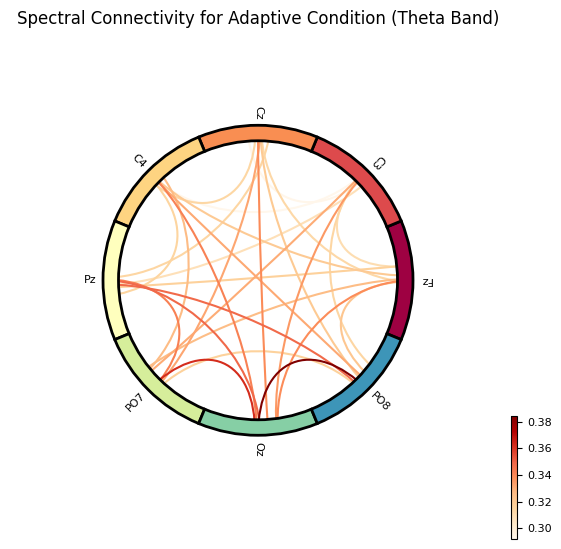

Mean PLI per band: alpha 0.15350651217553224


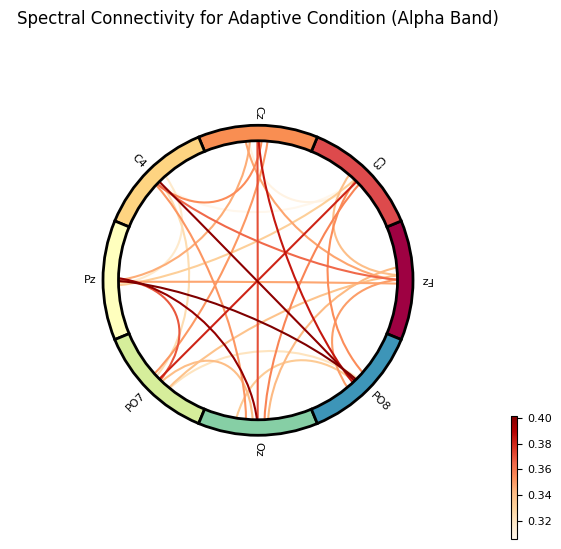

Mean PLI per band: beta 0.13171933262148075


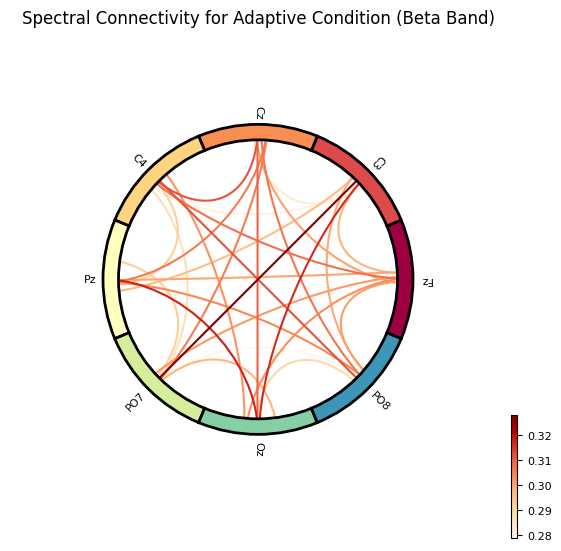

In [117]:
# Plot the connectivity circle for each frequency band
for band, con_list in con_adaptive_band.items():
    # Average the connectivity values across all instances
    con_matrices = [con.get_data() for con in con_list]
    con_matrices = [con.reshape(8, 8) for con in con_matrices]
    con_mean = np.mean(con_matrices, axis=0)
    print("Mean PLI per band:", band, np.mean(con_mean))

    # Plot the connectivity circle for the Adaptive condition
    plot_connectivity_circle(con_mean, node_names, n_lines=None, node_angles=None, node_colors=None, title=f'Spectral Connectivity for Adaptive Condition ({band.capitalize()} Band)', textcolor='black', facecolor='white', colormap='OrRd')

#### Random plots per frequency band (alpha, beta, theta)


Mean PLI per band: theta 0.14661296110336586


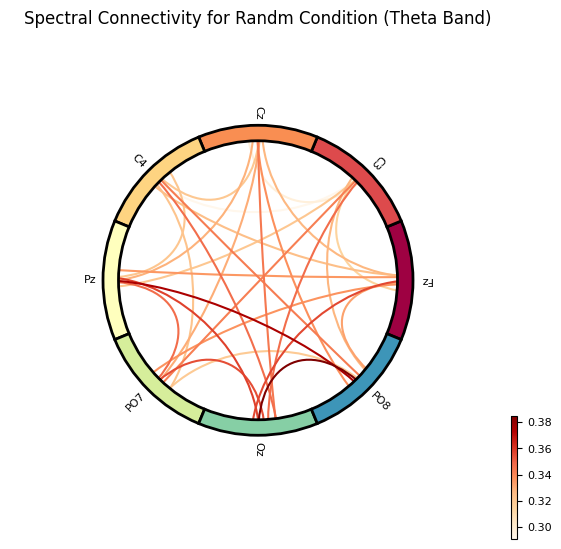

Mean PLI per band: alpha 0.15471671935023276


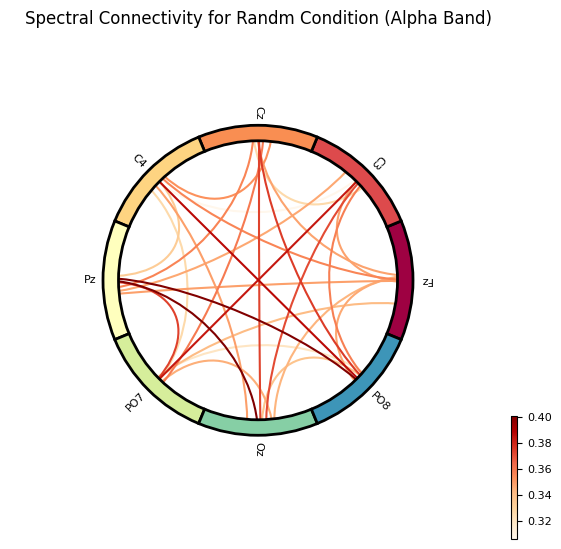

Mean PLI per band: beta 0.1368346306856338


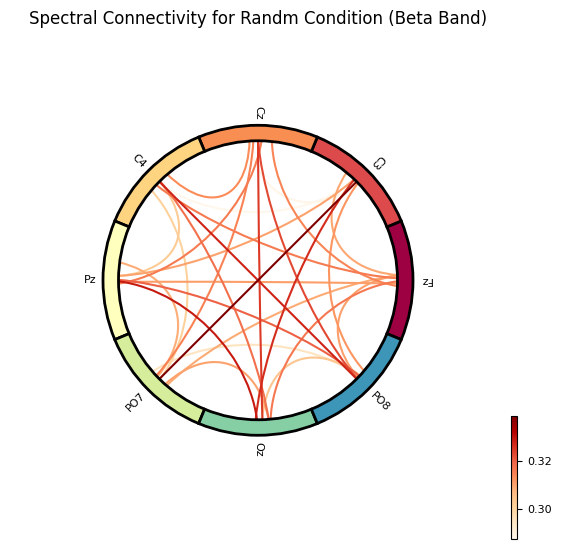

In [116]:
# Plot the connectivity circle for each frequency band
for band, con_list in con_random_band.items():
    # Average the connectivity values across all instances
    con_matrices = [con.get_data() for con in con_list]
    con_matrices = [con.reshape(8, 8) for con in con_matrices]
    con_mean = np.mean(con_matrices, axis=0)
    print("Mean PLI per band:", band, np.mean(con_mean))

    # Plot the connectivity circle for the Adaptive condition
    plot_connectivity_circle(con_mean, node_names, n_lines=None, node_angles=None, node_colors=None, title=f'Spectral Connectivity for Randm Condition ({band.capitalize()} Band)', textcolor='black', facecolor='white', colormap='OrRd')

That was a lot of plots! For easier comparison, here is a small clip of them side by side:

In [203]:
from IPython.display import Video

video_path = "/content/gdrive/MyDrive/ThesisGroup/IEEE2023 ComplexSystems/Complex systems/PLI.mp4"

# Display the video
Video(video_path, embed=True)

Again, the differences between conditions are not easily perceptible although there are some. The differences between connectivity in frequency bands on the other hand are more clear. In the theta band, the connectivity (PLI) is strongest between the parietal and parietal occipital electrodes, indicating that activity is focused there. Parietal theta activity has been connected with visual working memory (Tseng et al., 2018). Although the task for this dataset was mainly auditory (listening to information), it was delivered by a gesturing robot, which due to the novelty likely commanded a fair amount of attention.

Connecitvity in the alpha and beta band is more distributed across different areas, with the alpha connectivity plot being very similar to overall activity and beta focusing particularly on the connections between Central and Parietal electrodes on the same hemisphere.

### Connectivity by Region

To more clearly visualize the infromation flow between different brain regions, let's group the electrodes belonging to the same regions together and visualize PLI between these regions.

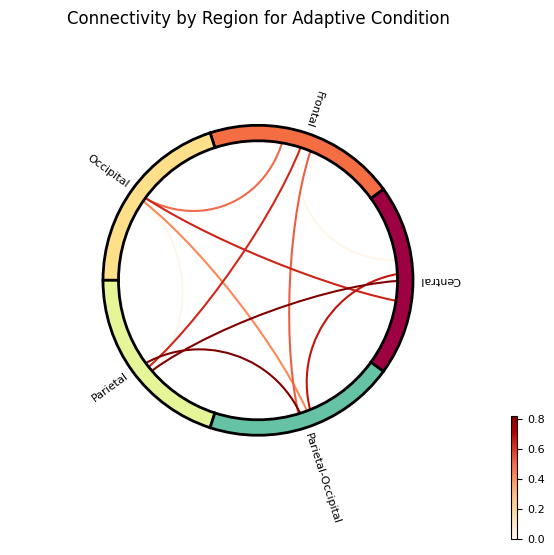

(<Figure size 800x800 with 2 Axes>,
 <PolarAxes: title={'center': 'Connectivity by Region for Adaptive Condition'}>)

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mapping of channels to regions
channel_to_region = {
    "Fz": "Frontal",
    "C3": "Central",
    "Cz": "Central",
    "C4": "Central",
    "Pz": "Parietal",
    "PO7": "Parietal-Occipital",
    "Oz": "Occipital",
    "PO8": "Parietal-Occipital",
}

# Function to aggregate connectivity values by region
def aggregate_by_region(con_matrix, channel_to_region):
    regions = sorted(set(channel_to_region.values()))
    region_indices = {region: [] for region in regions}
    for i, ch in enumerate(channel_to_region.keys()):
        region_indices[channel_to_region[ch]].append(i)
    
    aggregated_matrix = np.zeros((len(regions), len(regions)))
    for i, r1 in enumerate(regions):
        for j, r2 in enumerate(regions):
            aggregated_matrix[i, j] = np.mean(con_matrix[np.ix_(region_indices[r1], region_indices[r2])])

    return aggregated_matrix

# Aggregate the connectivity values for each region
con_matrices = [con.get_data() for con in con_adaptive]
con_matrices = [con.reshape(8, 8) for con in con_matrices]
con_matrices_aggregated = [aggregate_by_region(con, channel_to_region) for con in con_matrices]

con_random_mean = np.mean(con_matrices_aggregated, axis=0)

# Node names (regions)
node_names = sorted(set(channel_to_region.values()))

# Plot the connectivity circle
fig, ax = plt.subplots(figsize=(8, 8))
plot_connectivity_circle(con_random_mean, node_names, n_lines=None, node_angles=None, node_colors=None, title='Connectivity by Region for Adaptive Condition', fig=fig, subplot=111, show=True, textcolor='black', facecolor='white', colormap='OrRd')


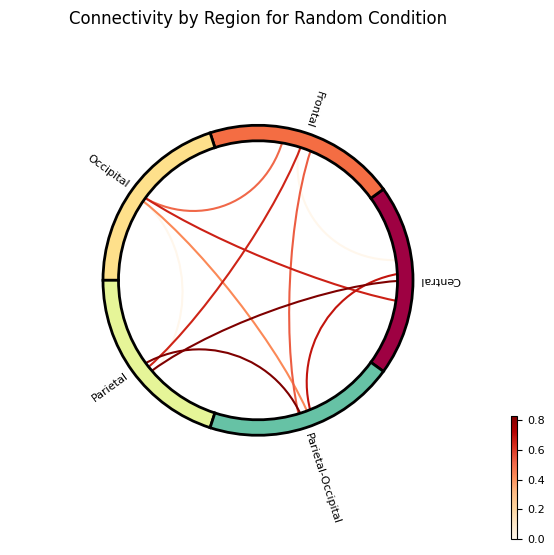

(<Figure size 800x800 with 2 Axes>,
 <PolarAxes: title={'center': 'Connectivity by Region for Random Condition'}>)

In [137]:
# Aggregate the connectivity values for each region
con_matrices = [con.get_data() for con in con_random]
con_matrices = [con.reshape(8, 8) for con in con_matrices]
con_matrices_aggregated = [aggregate_by_region(con, channel_to_region) for con in con_matrices]

con_random_mean = np.mean(con_matrices_aggregated, axis=0)

# Node names (regions)
node_names = sorted(set(channel_to_region.values()))

# Plot the connectivity circle
fig, ax = plt.subplots(figsize=(8, 8))
plot_connectivity_circle(con_random_mean, node_names, n_lines=None, node_angles=None, node_colors=None, title='Connectivity by Region for Random Condition', fig=fig, subplot=111, show=True, textcolor='black', facecolor='white', colormap='OrRd')
 

The differences between conditions become even less visible bur the connectivity between regions is more clear in these plots. The strongest connnections are a sort of triangle with bidirectional information flow between the Central, Parietal and Parietal-Occipital regions.There is also relatively strong connectivity between the Occipital to Central and Frontal to Parietal pairs, moderate connectivity between the Occpital, Frontal, Parietal-Occipital triangle. Interestingly, there is very little connectivity between the Occipital and Parietal region and the Frontal and Central region.

## References


Bressler, S.L., & Kelso, J.A. (2016). Coordination Dynamics in Cognitive Neuroscience. Frontiers in Neuroscience, 10.

Zhang, D., Zhao, H., Bai, W., & Tian, X. (2016). Functional connectivity among multi-channel EEGs when working memory load reaches the capacity. Brain research, 1631, 101-112.

Tóth, B., Boha, R., Pósfai, M., Gaál, Z. A., Kónya, A., Stam, C. J., & Molnár, M. (2012). EEG synchronization characteristics of functional connectivity and complex network properties of memory maintenance in the delta and theta frequency bands. International Journal of Psychophysiology, 83(3), 399-402.

Imperatori, L. S., Betta, M., Cecchetti, L., Canales-Johnson, A., Ricciardi, E., Siclari, F., ... & Bernardi, G. (2019). EEG functional connectivity metrics wPLI and wSMI account for distinct types of brain functional interactions. Scientific Reports, 9(1), 8894.

Briels, C. T., Schoonhoven, D. N., Stam, C. J., de Waal, H., Scheltens, P., & Gouw, A. A. (2020). Reproducibility of EEG functional connectivity in Alzheimer’s disease. Alzheimer's research & therapy, 12, 1-14.

Butler, E. A. (2011). Temporal interpersonal emotion systems: The “TIES” that form relationships. Personality and Social Psychology Review, 15(4), 367-393.

Miljevic, A., Bailey, N. W., Vila-Rodriguez, F., Herring, S. E., & Fitzgerald, P. B. (2022). Electroencephalographic connectivity: a fundamental guide and checklist for optimal study design and evaluation. Biological Psychiatry: Cognitive Neuroscience and Neuroimaging, 7(6), 546-554.

J.A. Scott Kelso (2009). Coordination dynamics. In R.A. Meyers (ed.)
Encyclopedia of complexity and systems sciences (pp. 1537-1564).
Berlin: Springer-Verlag.

MNE-Connectivity (Version 0.5.0) [Computer software]. (n.d.). Retrieved from https://mne.tools/mne-connectivity/stable/install.html

Tseng, P., Iu, K. C., & Juan, C. H. (2018). The critical role of phase difference in theta oscillation between bilateral parietal cortices for visuospatial working memory. Scientific Reports, 8, 349. https://doi.org/10.1038/s41598-017-18449-w
